In [1]:
from core import initialize_bodies
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [2]:
# initialize bodies with random masses, positions, and velocities over set range
# bodies[n] = Body(mass, position [x, y], velocity [vx, vy])
bodies = initialize_bodies(5, mass_range = [1, 10], position_range = [-25, 25], velocity_range = [-5, 5])

# printing sample values
print(bodies[0].mass)
print(bodies[0].position)
print(bodies[0].velocity)
print(len(bodies))

4.70468061212865
[  4.63675108 -19.68706058]
[ 4.44678895 -4.47144059]
5


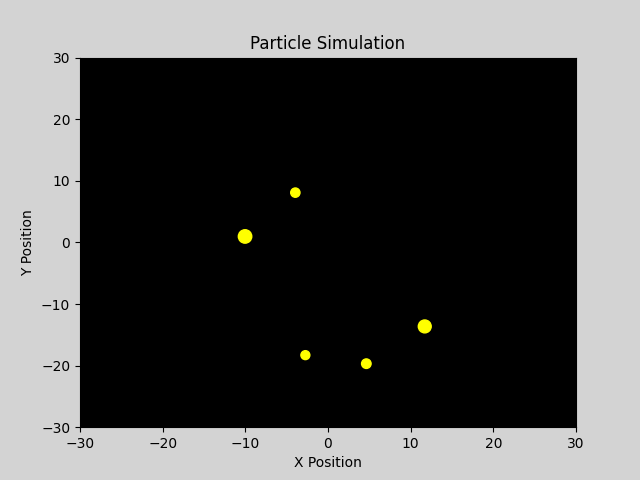

In [3]:
# Example animation using matplotlib

%matplotlib widget

# Time step for position updates
dt = 0.1

# Set up the plot
fig, ax = plt.subplots()
ax.set_xlim(-30, 30) # X-axis limits
ax.set_ylim(-30, 30) # Y-axis limits
ax.set_title("Particle Simulation", color="black")  # Title
ax.set_xlabel("X Position", color="black")  # X-axis label
ax.set_ylabel("Y Position", color="black")  # Y-axis label
ax.tick_params(axis='x', colors="black")  # X-axis ticks
ax.tick_params(axis='y', colors="black")  # Y-axis ticks
ax.set_facecolor("black")  # Set background color
fig.patch.set_facecolor("lightgray")  # Outside the plot

# Create scatter plot with initial positions
scat = ax.scatter(
    [body.position[0] for body in bodies], # Initial x-coordinate of bodies
    [body.position[1] for body in bodies], # Initial y-coordinate of bodies
    s=[body.mass * 10 for body in bodies], # Size of bodies proportional to mass
    c="yellow",  # Color of bodies
)

# Update function for animation
def update_position(frame):

    updated_positions = [] # Initialize as a list

    for body in bodies:
        body.position += body.velocity * dt  # Update positions
        updated_positions.append(body.position)  # Collect new positions
    scat.set_offsets(updated_positions)  # Update scatter plot
    
    return scat

# Create the animation
ani = animation.FuncAnimation(
    fig=fig,
    func=update_position,
    frames=range(50),  # Number of frames
    interval=50,  # Time between frames in milliseconds
    repeat=False,  # Stop after the last frame
)

# Show the plot
plt.show()